In [1]:
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

In [2]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [20]:
import sys
sys.path.append('../')
%matplotlib inline
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np
from utility import util
from matplotlib import colors
from matplotlib.colors import hsv_to_rgb

Загружаем изображение. Преобразуем в модель RGB

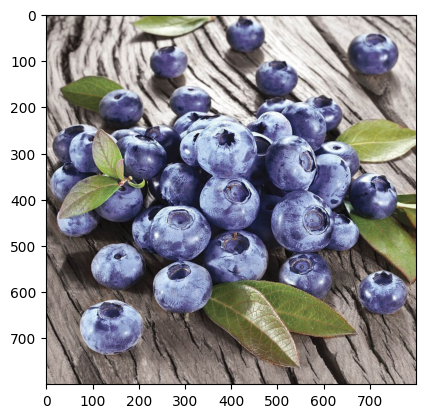

In [32]:
image = cv.imread('../images/lab5.jpg')
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.show();

Преобразуем изображение в цветовую модель HSV

Отобразим разные каналы полученного изображения на трехмерном графике

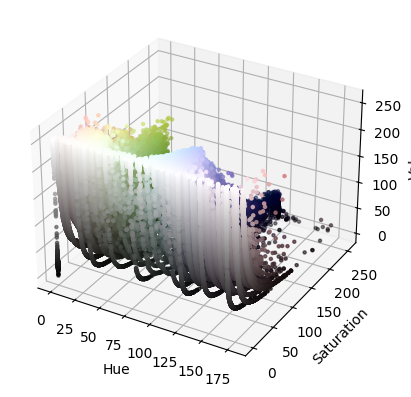

In [34]:
image_hsv = cv.cvtColor(image_rgb, cv.COLOR_RGB2HSV)
h, s, v = cv.split(image_hsv)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show();

Создадим маски для разных оттенков синего цвета

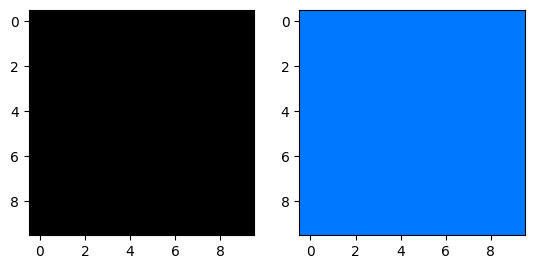

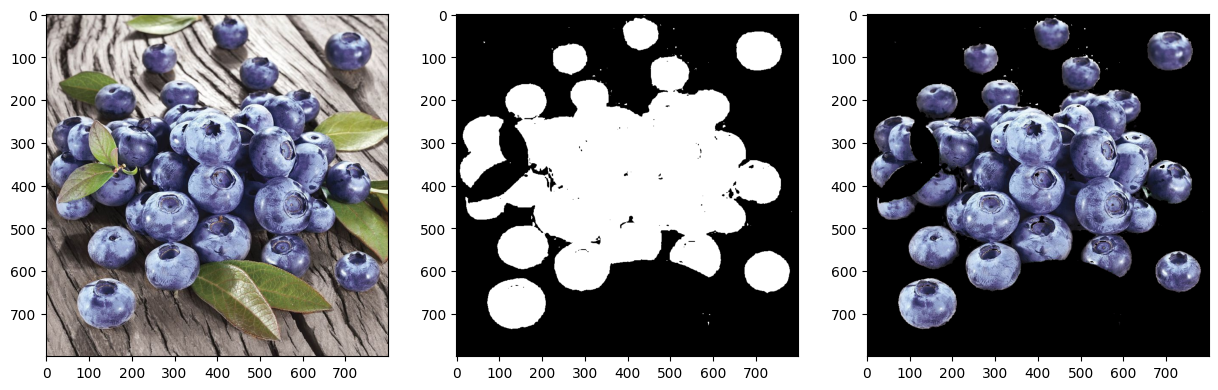

In [35]:
#lower_blue = np.array([70,0,0])
#upper_blue = np.array([150,255,255])

lower_blue = np.array([70,0,0])
upper_blue = np.array([150,255,255])
lo_square = np.full((10, 10, 3), lower_blue, dtype=np.uint8) / 255.0
do_square = np.full((10, 10, 3), upper_blue, dtype=np.uint8) / 255.0

plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(lo_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(do_square))
plt.show()

mask = cv.inRange(image_hsv, lower_blue, upper_blue)
result = cv.bitwise_and(image_rgb, image_rgb, mask=mask)

plt.figure(figsize=(15,20))
plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.subplot(1, 3, 2)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 3, 3)
plt.imshow(result)
plt.show();
